![Banner](../../assets/banner-sprint3-desafio.png)

## BIBLIOTECAS

Instalação de bibliotecas e importação.

### Pandas

In [42]:
%pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Matplotlib

In [43]:
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## ANÁLISE EXPLORATÓRIA DOS DADOS

Importação do dataset em `googleplaystore.csv` para a variável `df` (*DataFrame*), nomeada de acordo com os padrões da comunidade. 

In [44]:
df = pd.read_csv("./googleplaystore.csv")

Análise do formato do dataset, com número de linhas e colunas:

In [45]:
df.shape

(10841, 13)

Análise inicial de uma amostra das 5 primeiras linhas do dataset.

In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Análise dos tipos das colunas, a partir desta informação, verifica-se a necessidade de tratamento de dados para realização de cálculos, visto que as colunas que deveriam ter tipos numéricos estão com o tipo `object` .

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## TRATAMENTO DE DADOS

### Remoção de Duplicações

Antes de iniciar a tratativa, primeiramente serão verificadas as duplicações existentes (caso ocorram); obtemos 483 linhas:

In [48]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


Para remover as duplicações, será utilizado o método `drop_duplicates()`. O qual remove duplicações em linhas, considerando o DataFrame inteiro ou somente colunas específicas, se utilizado o parâmetro `subset=['coluna']`.  

Será utilizado o parâmetro `inplace=True` para aplicar o método diretamente na variável `df`, caso contrário seria necessário atribuir o novo DataFrame sem duplicações a outra variável.  

Além disso, também existe a opção de selecionar qual linha será mantida; a 1ª ocorrência é a mantida por default, porém com o parâmetro `keep='last'` é possível manter a última, por exemplo. Aqui será mantida a configuração default.

Por agora, enquanto ainda ocorre a familiarização com o dataset, serão excluídas as duplicações por match completo, de todas as colunas.

In [49]:
df.drop_duplicates(inplace=True)

O DataFrame original continha 10841 linhas, destas sendo 483 duplicações, então, subtraindo os valores deve-se obter 10358 linhas:

In [50]:
df.shape

(10358, 13)

### Conversão de Tipos

Os valores númericos serão convertidos para possibilitar a realização de análises calculáveis mais adiante. Antes disso, é necessário compreender a variabilidade de valores em cada coluna; o Pandas, por padrão, converte para o dtype `object` quando existem tipos "misturados" na coluna.  

Nos itens a seguir, os valores de cada coluna serão analisados para verificar qual o melhor tipo para conversão, e para isso será utilizado o método `unique()`. Logo após, será realizado o tratamento necessário da coluna e, por fim, a conversão.

#### Colunas: Category & Genres

Ambas colunas são categóricas e, para calculações, não será necessário nenhum tratamento. No entanto, é interessante entender o tipo de valor que elas contêm, para verificar se podem ser úteis na análise do dataset. 

Para a coluna `Category` nota-se o padrão maiúsculas, com palavras separadas por símbolo *underline*. Além disso, existe um valor fora desse padrão `1.9` , que deverá ser localizado e tratado.

In [51]:
print(f"Quantidade de valores distintos: {df['Category'].nunique()}.\n \
      {'-'*100}\nAmostra de valores:\n\n{df['Category'].unique()}")

Quantidade de valores distintos: 34.
       ----------------------------------------------------------------------------------------------------
Amostra de valores:

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


Na coluna `Genres`, verifica-se que existe multivaloração, com gêneros diferentes mas relacionados separados por `;` . Por agora, para as primeiras análises, esse tratamento não será feito, porém é importante saber e considerar como estão dispostos os valores nessa coluna, caso seja utilizada. 

In [52]:
print(f"Quantidade de valores distintos: {df['Genres'].nunique()}.\n \
      {'-'*100}\nAmostra de valores:\n\n{df['Genres'].unique()}")

Quantidade de valores distintos: 120.
       ----------------------------------------------------------------------------------------------------
Amostra de valores:

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Boa

#### Tratamento da Linha 10472: Deslocamento de Valores à Esquerda

Somente um valor contém um caractere numérico `1.9` na coluna `Category`. Observando o restante dos dados da linha `10472`, nota-se o indício de um deslocamento à esquerda dos valores de todas as colunas.

Utilizando o método `loc`, será selecionado o número da linha `10472`, e as colunas serão salvas em uma lista para a manipulação dos dados. Como o valor da coluna `Category` ficará vazio, para contornar esse problema, será valorado como "NAO_INFORMADO", mantendo o padrão do restante dos valores.  

Além disso, como a coluna `Rating` já possui o dtype `float64`, será preciso converter o valor em `valores[1]` dos valores, antes da realocação para a coluna `Rating`, para que não ocorra nenhum erro de incompatibilidade.

In [53]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [54]:
# Obtendo os valores atuais da linha 10472
valores = df.loc[10472].tolist()

# Convertendo valores[1] para float, visto que a coluna 'Ratings' já possui tipo float64
valores[1] = float(valores[1])

# Mantendo o valor inicial da coluna 'App', adicionando 'Não Informado' na coluna seguinte, e deslocando o restante dos valores para a direita
valores_realocados = [valores[0]] + ['NAO_INFORMADO'] + valores[1:-1]

# Atualizando os valores no DataFrame com os valores realocados
df.loc[10472] = valores_realocados

Abaixo, uma confirmação de que a linha foi tratada adequadamente.

In [55]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                    NAO_INFORMADO
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

#### Coluna: Reviews

Com a verificação abaixo, e considerando que se trata de uma contagem de número de reviews, será feita a transformação da coluna para o tipo `integer`.

In [56]:
print(f"Quantidade de valores distintos: {df['Reviews'].nunique()}.\n \
    {'-'*100}\nAmostra de valores:\n\n{df['Reviews'].unique()}")


Quantidade de valores distintos: 6002.
     ----------------------------------------------------------------------------------------------------
Amostra de valores:

['159' '967' '87510' ... '603' '1195' '398307']


Aplicando uma conversão temporária para `string` com `.str`, utiliza-se o método `contains()` com padrões RegEx, para identificar valores na coluna que contenham o padrão indicado.  

Será verificado se existe algum valor na coluna `Reviews` que não seja numérico, desprezando valores nulos.

Descrição do RegEx:

- `[a-zA-Z]+` um ou mais caracteres alfabéticos, incluindo minúsculas e maiúsculas

In [57]:
df[df['Reviews'].str.contains(r'[a-zA-Z]+', regex=True, na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Com essa confirmação, é possível realizar a alteração da coluna para o tipo `int` sem qualquer erro.

In [58]:
df['Reviews'] = df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


#### Coluna: Size

Com a verificação abaixo, nota-se que a coluna `Size` tem o padrão de um valor numérico seguido de `M` para "megabytes" ou `k` para "kilobytes".

In [59]:
print(f"Quantidade de valores distintos: {df['Size'].nunique()}.\n{'-'*100}\n \
Amostra de valores:\n\n{df['Size'].unique()}")

Quantidade de valores distintos: 461.
----------------------------------------------------------------------------------------------------
 Amostra de valores:

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M'

Abaixo, confirmamos que não existe mais nenhum outro prefixo relacionado à grandeza de tamanho, como `g` ou `G` para "gigabytes".

In [60]:
df[df['Size'].str.contains(r'^[0-9]+\.?[0-9]*[^Mk]$', regex=True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Agora será necessário adotar uma só grandeza para a coluna: todos os valores serão mantidos em "megabytes", para isso será preciso selecionar somente os valores em "kilobytes" e convertê-los, dividindo por `1000` .

Existe um único caso com valor decimal, linha `1532`, que será monitorado para assegurar que foi convertido corretamente.

In [61]:
df[df['Size'].str.contains(r'^[0-9]+\.[0-9]*[^M]$', regex=True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8.5k,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up


Será utilizada uma ***boolean mask***, uma máscara booleana, que é um identificador de linhas que atendem a uma determinada condição, neste caso, correspondente ao RegEx `^[0-9]+\.?[0-9]*k$`:

- `^[0-9]+` iniciado com um ou mais caracteres numéricos
- `\.?` seguido ou não de ponto decimal
- `[0-9]*` seguido de zero ou mais caracteres numéricos
- `k$` finalizado com o caractere 'k'

O padrão acima seleciona tanto valores inteiros quanto valores com casas decimais, por exemplo, `20` ou `20.5` ou `20.56` são igualmente extraídos.  

In [62]:
# Localizando valores em kilobytes e salvando em uma variável boolean mask
kilobytes_mask = df['Size'].str.contains(r'^[0-9]+\.?[0-9]*k$', regex=True)

A seguir, a ***boolean mask*** é aplicada na coluna `Size` para seleção e tratamento somente dos valores em "kilobytes".  

O método `extract()` utiliza um padrão RegEx para capturar a parte numérica. O parâmetro `expand` retorna:

- `True` o DataFrame completo
- `False` somente o Array com a coluna

Em seguida, o valor extraído é convertido para `float`; e, por fim, dividido por `1000` com o método `div()`, efetuando a conversão para "megabytes".  

Essas modificações são atualizadas na coluna `Size`.

In [63]:
df.loc[kilobytes_mask, 'Size'] = (                    # Atualizando a coluna com as modificações a seguir
    df.loc[kilobytes_mask, 'Size']                    # Selecionando somente os valores True em 'kilobytes_mask'
    .str.extract(r'([0-9]+\.?[0-9]*)', expand=False)  # Extraindo somente a parte numérica
    .astype(float)                                    # Convertendo para float
    .div(1000)                                        # Convertendo para megabytes
)

Verificando se a linha monitorada `1532` foi convertida de acordo:

In [64]:
df.loc[1532]

App               Essential Resources
Category           LIBRARIES_AND_DEMO
Rating                            4.6
Reviews                           237
Size                           0.0085
Installs                      50,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres               Libraries & Demo
Last Updated       September 27, 2017
Current Ver                      1.02
Android Ver                7.1 and up
Name: 1532, dtype: object

Para tratativa dos valores que possuem o caractere `M` para a quantidade de "megabytes", será utilizada a mesma lógica, com uma alteração no padrão RegEx para selecionar tais valores:

- `^[0-9]+` iniciado com um ou mais caracteres numéricos
- `\.?` seguido ou não de ponto decimal
- `[0-9]*` seguido de zero ou mais caracteres numéricos
- `M$` finalizado com o caractere 'M'

In [65]:
# Localizando valores em megabytes e salvando em uma variável boolean mask
megabytes_mask = df['Size'].str.contains(r'^[0-9]+\.?[0-9]*M$', regex=True, na=False)

df.loc[megabytes_mask, 'Size'] = ( # Atualizando a coluna com as modificações a seguir
    df.loc[megabytes_mask, 'Size']
    .str.extract(r'([0-9]+\.?[0-9]*)', expand=False)  # Extraindo parte numérica
    .astype(float)  # Convertendo para float
)

Finalizado o tratamento dos valores numéricos no padrão de "kilobytes" e "megabytes", agora serão verificados casos não-numéricos.

O padrão RegEx abaixo seleciona linhas que não possuem nenhum dígito; nota-se que temos `1695` valores, aparentemente todos sendo `Varies with device`, ou seja, que variam de acordo com o dispositivo.  

Descrição do RegEx:

- `^` indica o início do valor *(convertido temporariamente para string)*
- `[^0-9]` o `^` dentro dos colchetes indica negação, portanto, exclui caracteres que sejam numéricos
- `.*` seleciona quaisquer caracteres que não foram anteriormente negados, ou seja, caracteres não-numéricos
- `$` indica o fim do valor

*OBS: como o padrão está entre `^$`, está sendo buscado um match total.*

In [66]:
df[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


Utilizando o mesmo padrão anterior, confirmamos com `unique()` que `Varies with device` é o único valor não numérico.

In [67]:
df[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False)]['Size'].unique()

array(['Varies with device'], dtype=object)

Antes de realizar a conversão da coluna `Size` para `float`, será adotado o valor `-1` para esses dados, visto que é um valor "irreal" para um tamanho de aplicativo, portanto será tratado com essa semântica específica. 

Lembrando que, durante a realização de análises estatísticas, será preciso considerar e filtrar esses valores para que não ocorram distorções indesejadas na análise.

In [68]:
df.loc[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False), 'Size'] = -1

Agora, que a coluna só contém dados numéricos, será convertida para `float`.

In [69]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839      -1
10840    19.0
Name: Size, Length: 10358, dtype: object

In [70]:
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


#### Coluna: Installs

Com a verificação abaixo, nota-se o padrão para a coluna `Installs`: valor numérico, com milhares separados por vírgula, seguidos de `+`. Indicando que a quantidade de instalações excede tal valor. Ex: `10,000+` significa "mais de 10000 instalações". 

Para esta coluna, será considerado somente o valor numérico e, para não perder a informação transmitida com `+`, a coluna será renomeada posteriormente para refletir essa semântica.

Será preciso decidir o que fazer com o valor `Free`, o qual seria mais adequado na coluna `Type`. Este caso será tratado separadamente.

In [71]:
print(f"Quantidade de valores distintos: {df['Installs'].nunique()}.\n{'-'*100}\n \
Amostra de valores:\n\n{df['Installs'].unique()}")

Quantidade de valores distintos: 21.
----------------------------------------------------------------------------------------------------
 Amostra de valores:

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


Abaixo, com o método `replace()` as vírgulas são removidas (na realidade, substituídas por "nada") e, em seguida, os valores numéricos são extraídos com `extract()`, desprezando o `+`, e a coluna `Installs` atualizada com o resultado.

In [72]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'].unique()

array(['10000+', '500000+', '5000000+', '50000000+', '100000+', '50000+',
       '1000000+', '10000000+', '5000+', '100000000+', '1000000000+',
       '1000+', '500000000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '0+', '0'], dtype=object)

In [73]:
df['Installs'] = df['Installs'].str.extract(r'([0-9]+\.?[0-9]*)', expand=False)
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Após a tratativa, mantidos somente os caracteres numéricos, é possível realizar a conversão da coluna para `int`.

In [98]:
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


#### Coluna: Price

Visto que temos muitos valores `0` na coluna `Price`, abaixo é feita uma seleção de amostra de valores diferentes de `0`.  
Assumindo que a coluna adota o padrão `$` seguido de valor decimal, será feita a extração do valor numérico e conversão para `float`.

In [75]:
print(f"Quantidade de valores distintos: {df['Price'].nunique()}.\n{'-'*100}\n \
Amostra de valores:\n\n{df[df['Price'] != '0']['Price'].unique()}")

Quantidade de valores distintos: 92.
----------------------------------------------------------------------------------------------------
 Amostra de valores:

['$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49' '$10.99'
 '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95' '$4.49'
 '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99' '$400.00'
 '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29'
 '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99' '$19.90'
 '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99' '$3.08'
 '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$4.29'
 '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97' '$200.00'
 '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20' '$1.04']


In [76]:
df['Price'] = df['Price'].str.extract(r'([0-9]+\.?[0-9]*)', expand=False)
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [77]:
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


#### Coluna: Last Updated

In [78]:
print(f"Quantidade de valores distintos: {df['Last Updated'].nunique()}.\n{'-'*100}\n\
Amostra de valores:\n\n{df['Last Updated'].unique()}")

Quantidade de valores distintos: 1377.
----------------------------------------------------------------------------------------------------
Amostra de valores:

['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']


In [99]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


## ANÁLISE DESCRITIVA E VISUALIZAÇÃO DE DADOS

Para as análises seguintes, foi decidido remover as duplicações relacionadas à coluna `App`, visto que queremos analisar os aplicativos uma única vez, desconsiderando possíveis versões diferentes do mesmo aplicativo. 

Como queremos obter a versão mais recente, será adotado o parâmetro `keep='last'`.

In [100]:
df.drop_duplicates(subset=['App'], inplace=True, keep='last')

### Top 5 Apps: Número de Instalações

Antes de plotar o gráfico com os 5 apps com maior número de instalações, primeiramente, será verificado quantos apps possuem o valor máximo da coluna.

In [102]:
print(df[df['Installs'] == df['Installs'].max()].value_counts().sum())

20


Obtemos 20 aplicativos com valor máximo, portanto, a plotagem em barras só trará uma amostra desses aplicativos.

In [103]:
top_instalacoes = df[df['Installs'] == df['Installs'].max()]
top_instalacoes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,-1.0,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,-1.0,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,-1.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


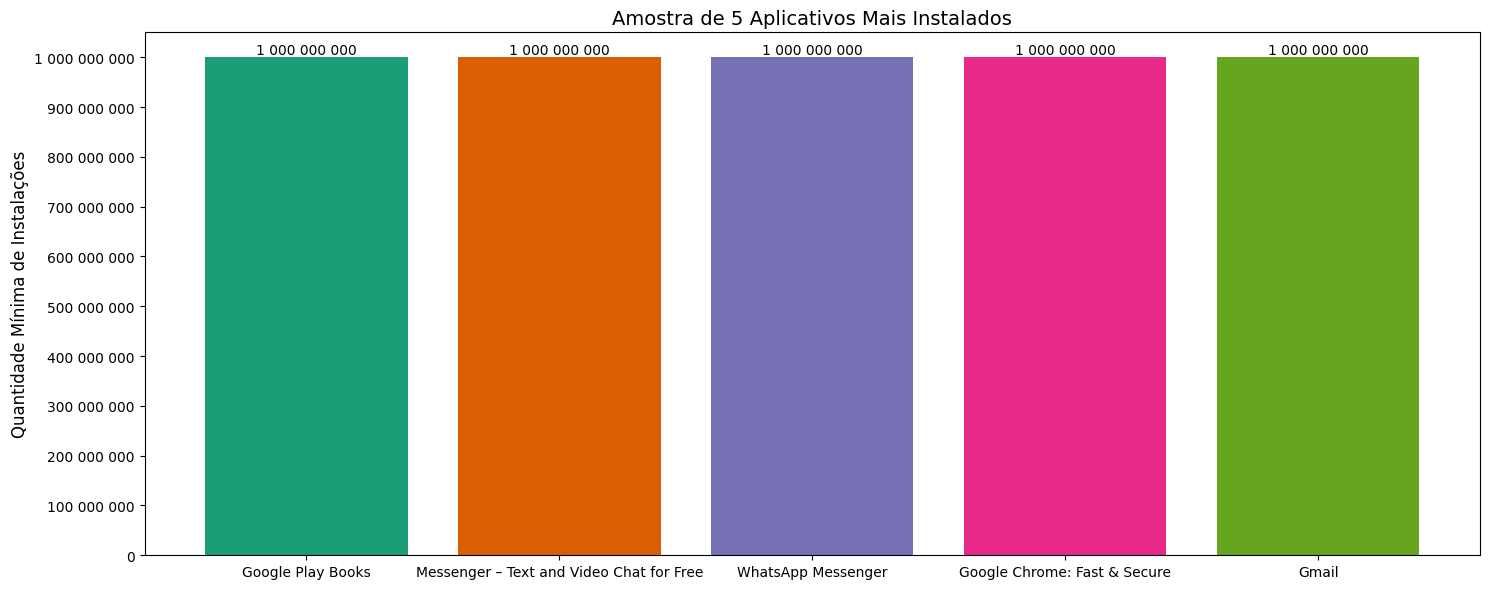

In [104]:
# Selecionando os 5 maiores valores da coluna 'Installs'
top_5_instalacoes = df.nlargest(5, 'Installs')

# Especificando o espaço e tamanho da plotagem
plt.figure(figsize=(15, 6))

# Criando o gráfico Bar Plot / Barras
posicao_barras = range(len(top_5_instalacoes['App']))  # Posição das barras
barras = plt.bar(posicao_barras, top_5_instalacoes['Installs'], color=plt.cm.Dark2.colors)

# Anotando os valores de cada barra
for barra in barras:
    altura = barra.get_height()  # Obtendo a altura da barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # coordenada X (centro da barra)
        altura + 10,                    # coordenada Y (ligeiramente acima da barra)
        f'{altura:,}'.replace(',', ' '),   # formatando valores com espaços
        ha='center', va='bottom', fontsize=10, color='black'
)

# Definindo as legendas do eixo Y e a escala dos ticks, de 100M em 100M até chegar no valor de 1 bilhão
yticks = range(0, 1_100_000_000, 100_000_000)
ytick_labels = [f'{y:,.0f}'.replace(',', ' ') for y in yticks]  # Formatando com espaços em vez de vírgulas
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.ylabel('Quantidade Mínima de Instalações', fontsize=12)

# Definido as posições dos ticks e legendas do eixo X
plt.xticks(ticks=posicao_barras, labels=top_5_instalacoes['App'], rotation=0, ha='center')


plt.title('Amostra de 5 Aplicativos Mais Instalados', fontsize=14)
plt.tight_layout()
plt.show()


Isso ocorre pois essa coluna contém intervalos de valores de instalação, sendo considerados sempre o valor mínimo de instalações. Portanto, qualquer variabilidade entre os valores já veio suprimida no dataset original.

#### Gráfico Alternativo: Instalações por Categoria

Uma alternativa para obter valores mais interessantes para nossa análise de mercado, é entender a quantidade de instalaçoes agrupadas por categoria.

Para melhor visibilidade, foi utilizado um gráfico de barras horizontais, devido ao grande número de categorias diferentes. E também, uma inversão dos valores no eixo Y, assim, os valores de maior interesse (as grandes quantidades) ficam mais próximas das marcações no eixo X.

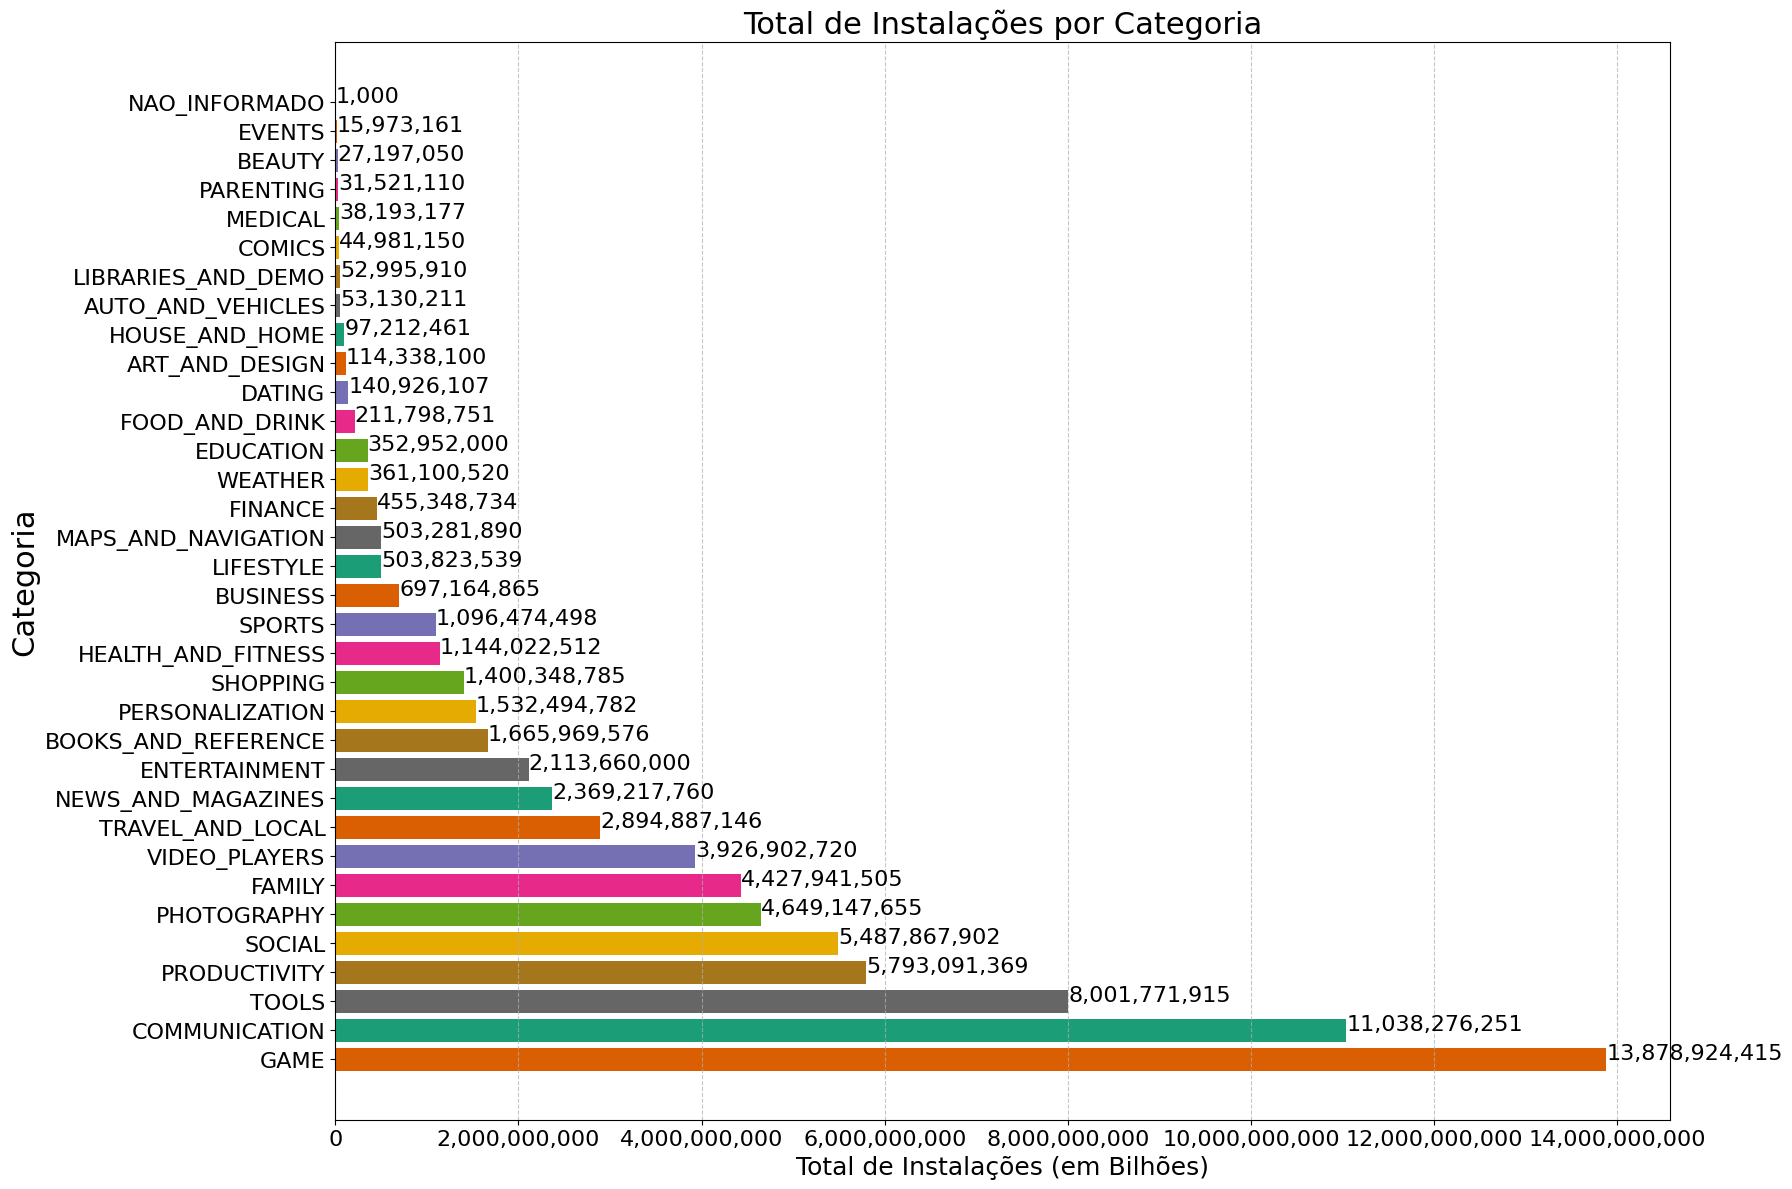

In [106]:
# Agrupando por categoria e soma total de instalações
instalacoes_por_categoria = df.groupby('Category')['Installs'].sum().sort_values()

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(18, 12))
barras = plt.barh(instalacoes_por_categoria.index, instalacoes_por_categoria.values, color=plt.cm.Dark2.colors)

# Anotando cada barra com o total de instalações
for barra in barras:
    largura = barra.get_width()  # Obtendo o comprimento da barra
    plt.text(
        largura,                # Posicionando o texto ao final da barra
        barra.get_y() + barra.get_height() / 2,  # Centralizando o texto verticalmente
        f'{int(largura):,}',    # Formatando o valor com vírgulas
        fontsize=16
    )

plt.title('Total de Instalações por Categoria', fontsize=22)
plt.xlabel('Total de Instalações (em Bilhões)', fontsize=18)
plt.ylabel('Categoria', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Formatando o eixo-x com vírgulas para melhor legibilidade
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Invertendo o eixo y para mostrar as categorias de cima para baixo
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

Abaixo conseguimos visualizar as tendências de instalações aplicadas ao gênero de aplicativo. Como existia uma quantidade muito grande de valores em `Genres`, foram filtradas as linhas para obtermos somente valores acima de 500 milhões.

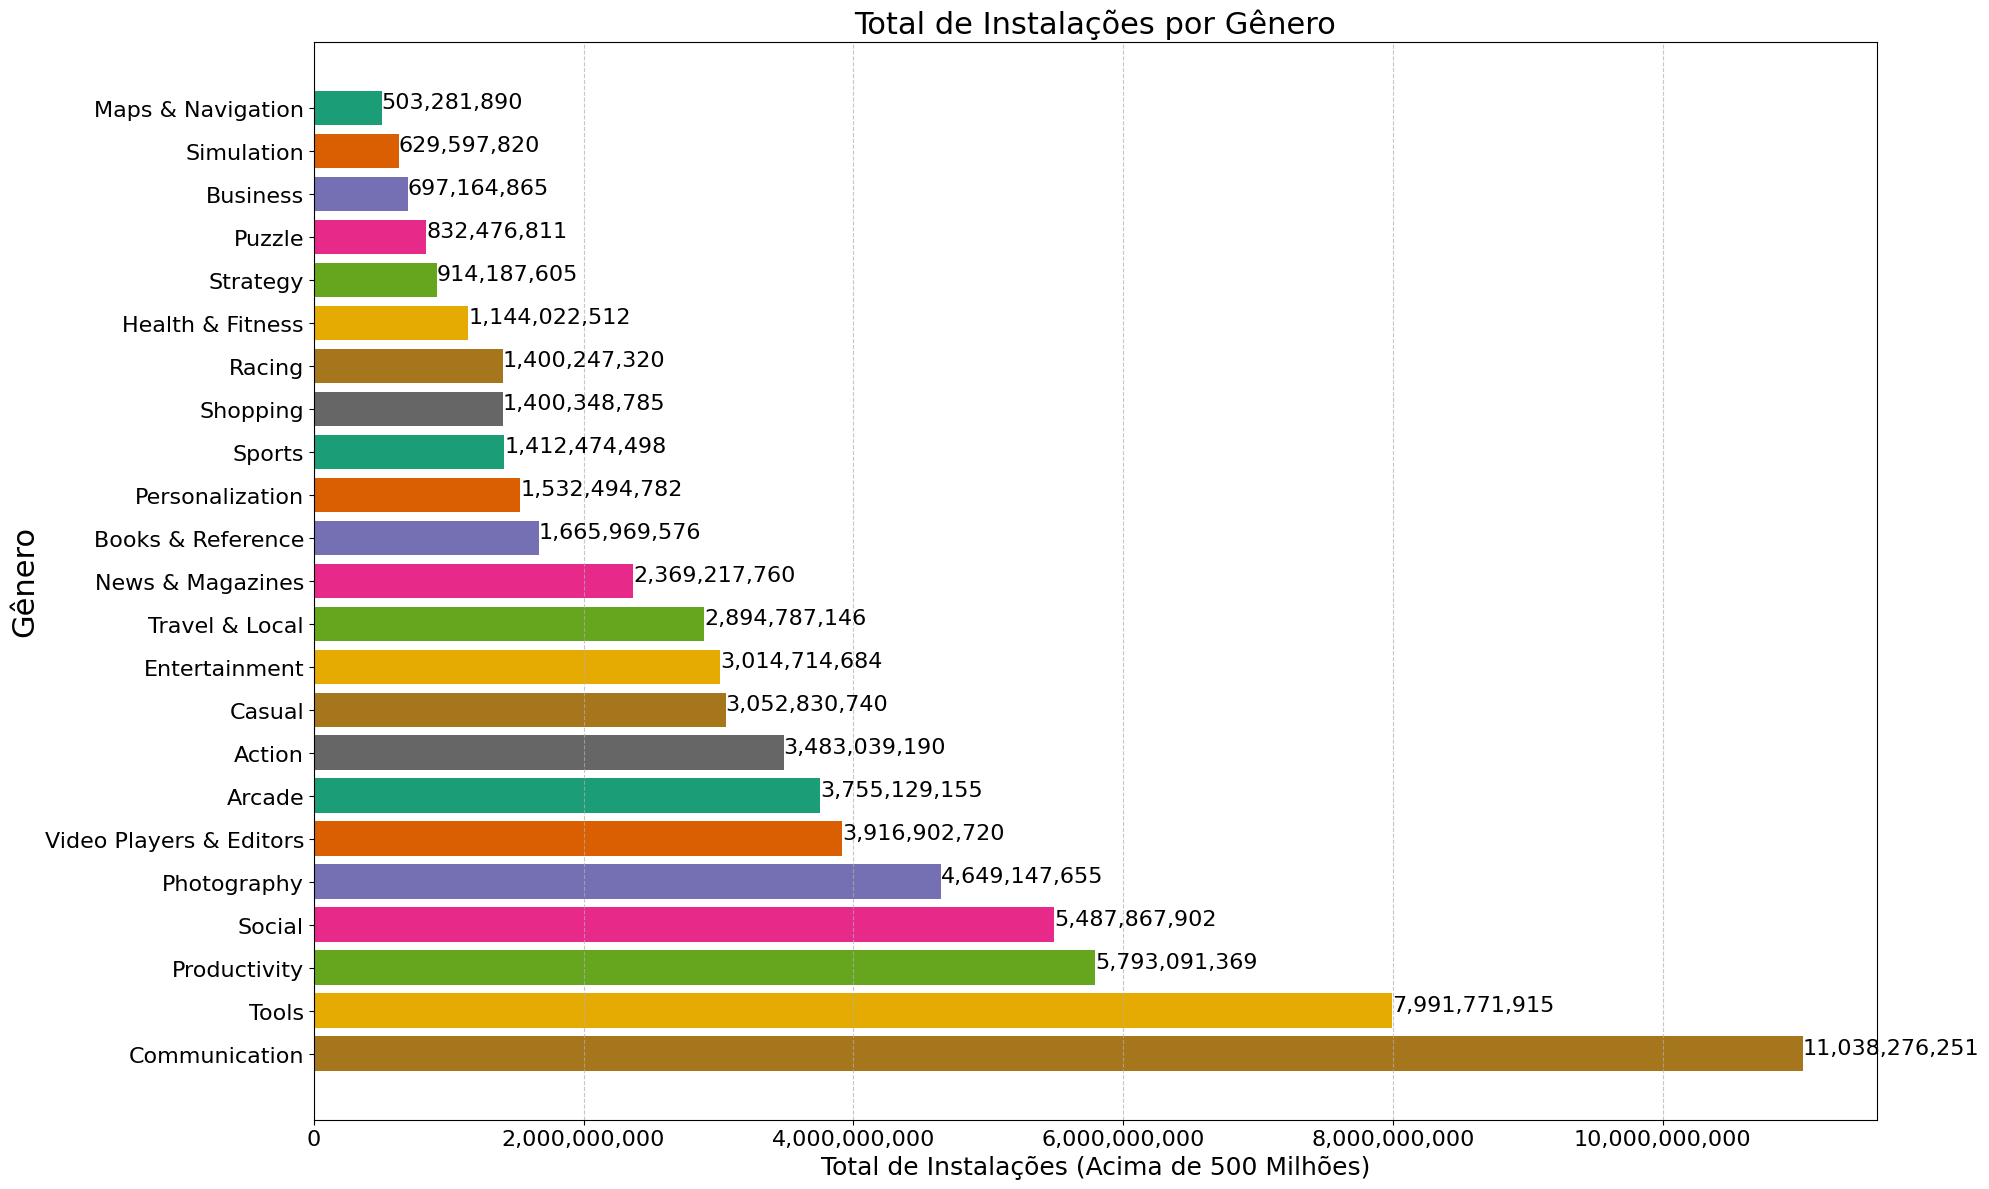

In [108]:
# Agrupando por gênero e soma total de instalações
instalacoes_por_genero = df.groupby('Genres')['Installs'].sum().sort_values()
# Filtrando somente gêneros com mais de 500 milhões de instalações
instalacoes_por_genero = instalacoes_por_genero[instalacoes_por_genero > 500000000]

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(20, 12))
barras = plt.barh(instalacoes_por_genero.index, instalacoes_por_genero.values, color=plt.cm.Dark2.colors)

# Anotando cada barra com o total de instalações
for barra in barras:
    largura = barra.get_width()  # Obtendo o comprimento da barra
    plt.text(
        largura,                # Posicionando o texto ao final da barra
        barra.get_y() + barra.get_height() / 2,  # Centralizando o texto verticalmente
        f'{int(largura):,}',    # Formatando o valor com vírgulas
        fontsize=16
    )


plt.title('Total de Instalações por Gênero', fontsize=22)
plt.xlabel('Total de Instalações (Acima de 500 Milhões)', fontsize=18)
plt.ylabel('Gênero', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Formatando o eixo-x com vírgulas para melhor legibilidade
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Invertendo o eixo y para mostrar as categorias de cima para baixo
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

### Frequência de Categorias de Apps

Abaixo, o gráfico de pizza `pie plot` para a distribuição de frequência de valores distintos em `Category`.

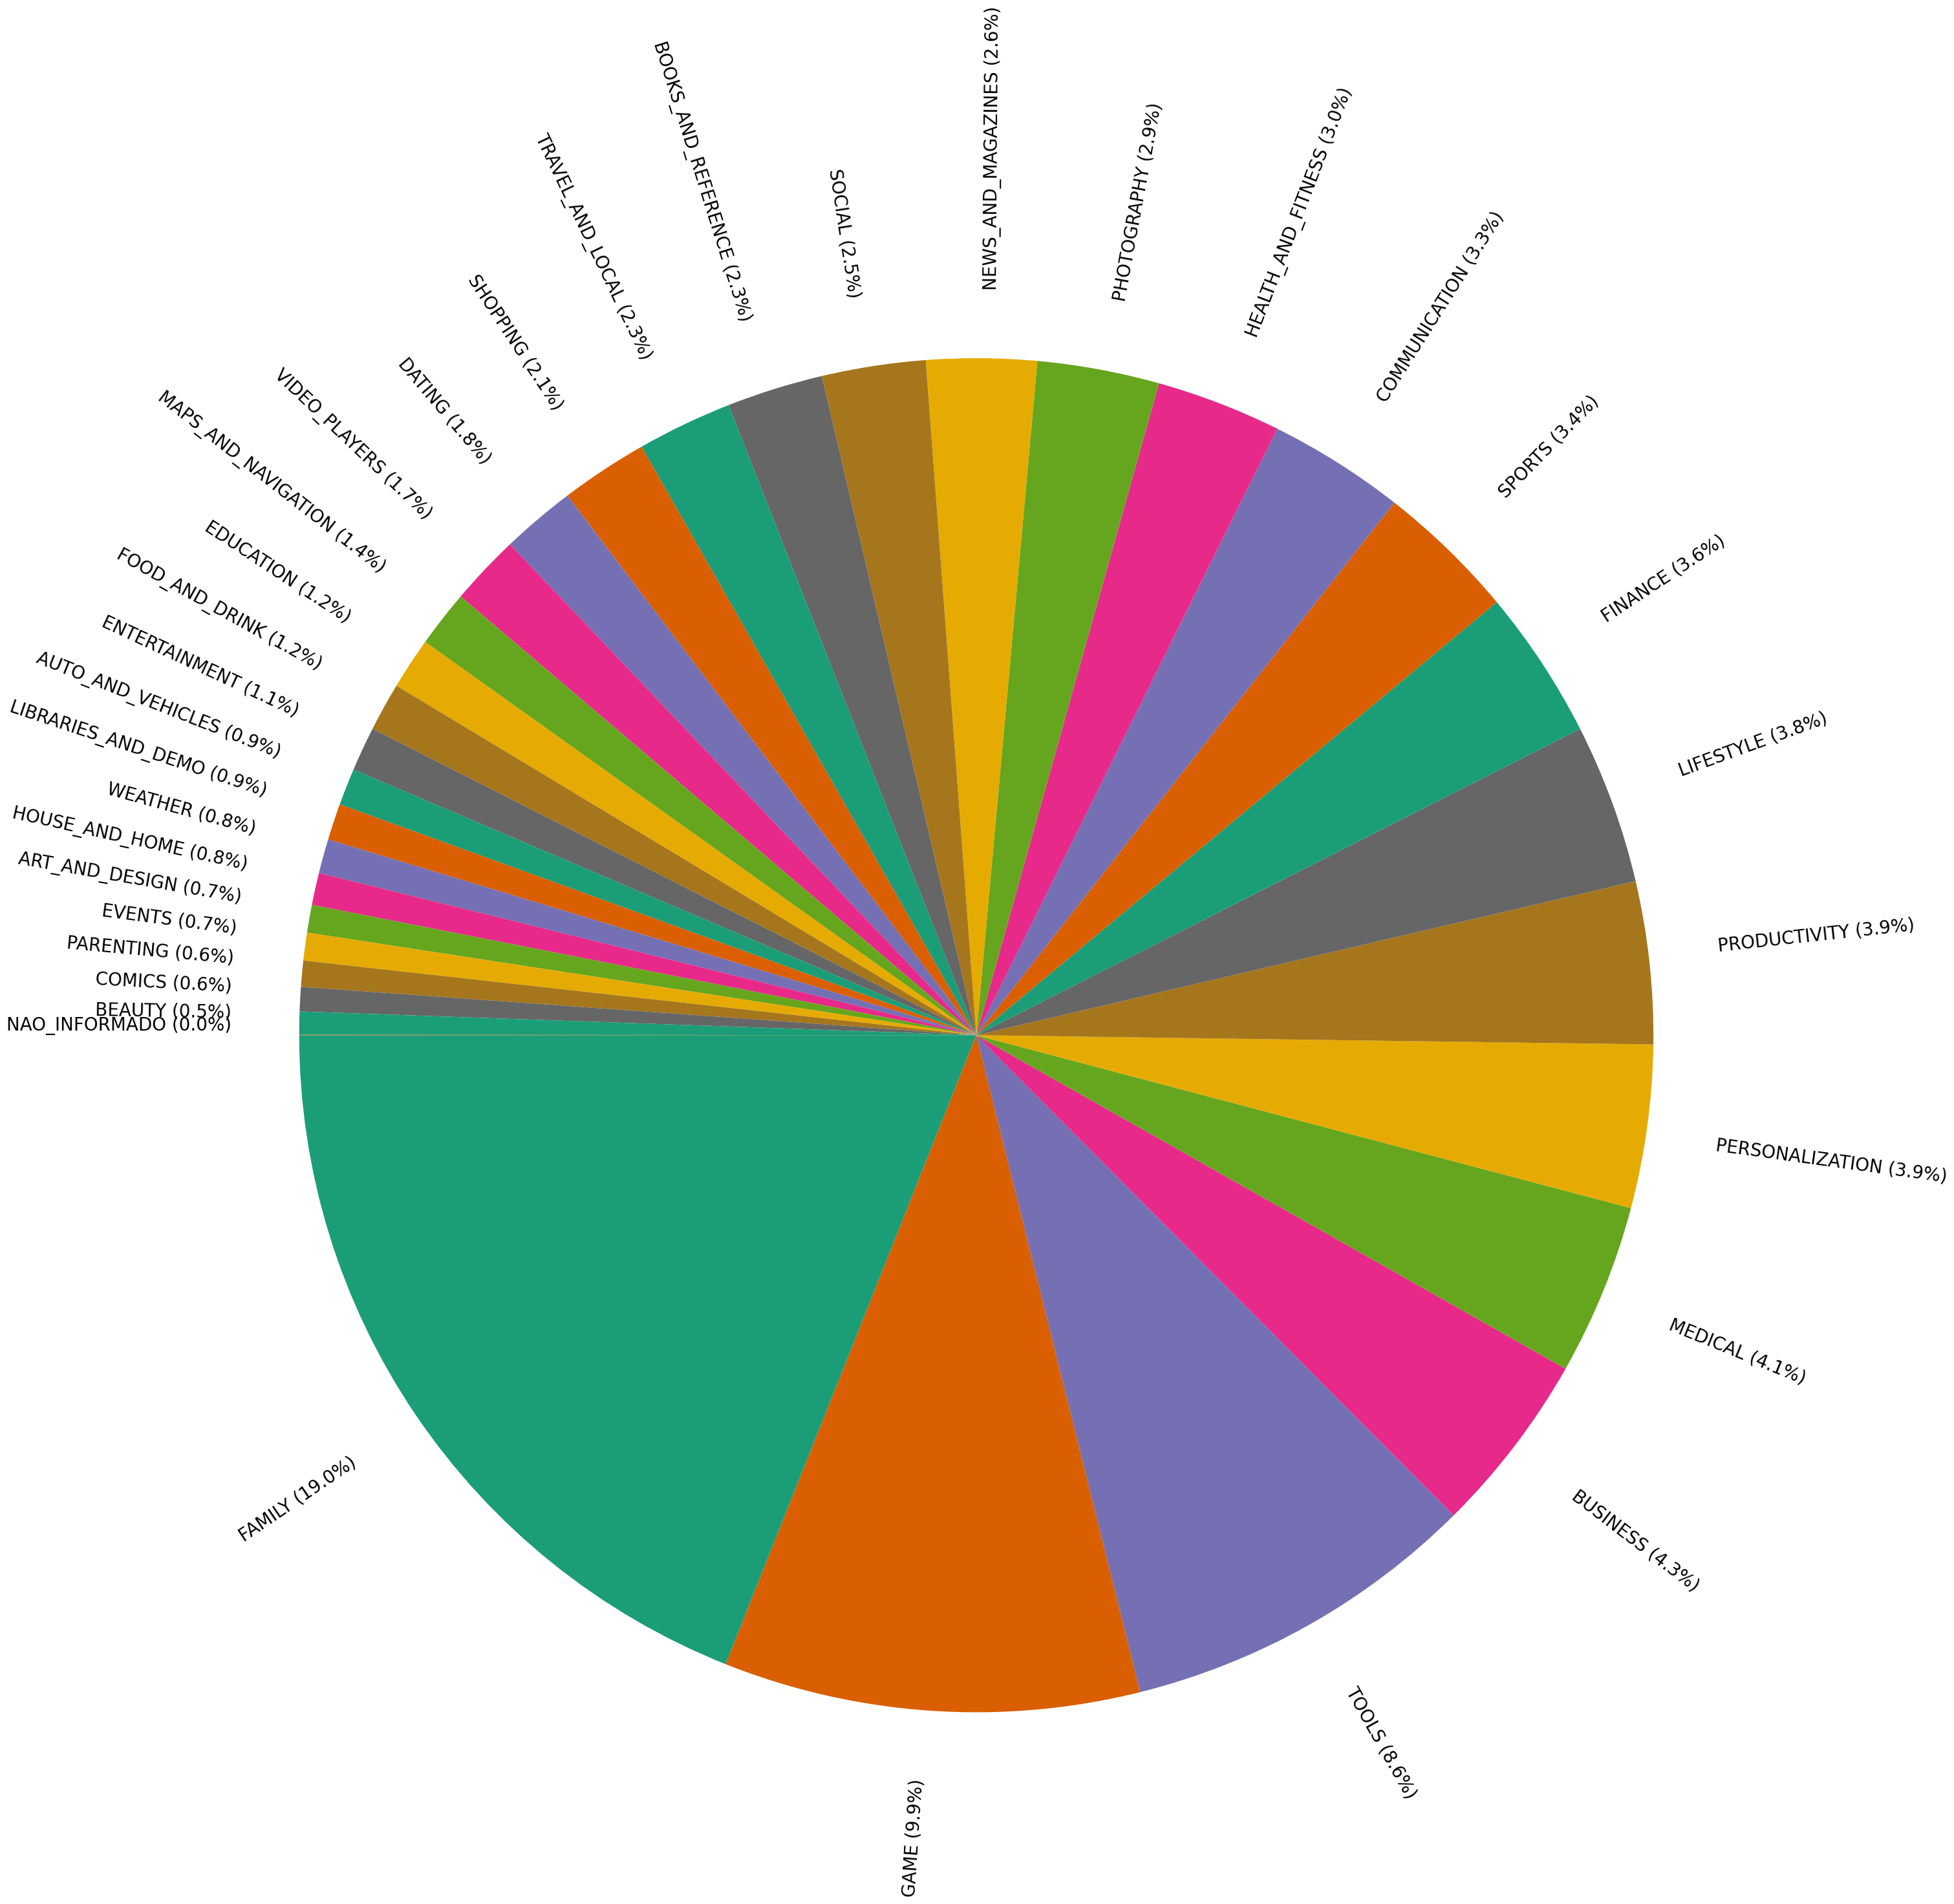

In [111]:
# Calculando a contagem de Categorias
contagem_categorias = df['Category'].value_counts()

# Combinando as labels de Categorias com as respectivas percentagens
labels = [f"{label} ({value/sum(contagem_categorias)*100:.1f}%)" 
          for label, value in zip(contagem_categorias.index, contagem_categorias.values)]

# Plotando gráfico de pizza / Pie Chart
plt.figure(figsize=(34, 34))
plt.pie(
    contagem_categorias,
    labels=labels,
    autopct=None,
    startangle=180,
    colors=plt.cm.Dark2.colors,
    rotatelabels=True,
    textprops={'fontsize': 20}
)

plt.show()

Devido ao grande número de categorias distintas, e a granularidade de frequência entre elas, este não é o gráfico mais adequado para este tipo de análise. Pois, com exceção dos valores mais altos das categorias FAMILY, GAME e TOOLS, a relação comparativa entre as demais categorias se perde na visualização.

#### Distribuição de Categorias: Visualização Alternativa

Para obter uma visão melhor da distribuição, optamos novamente pelo gráfico de barras horizontais, mais indicado nesse caso.

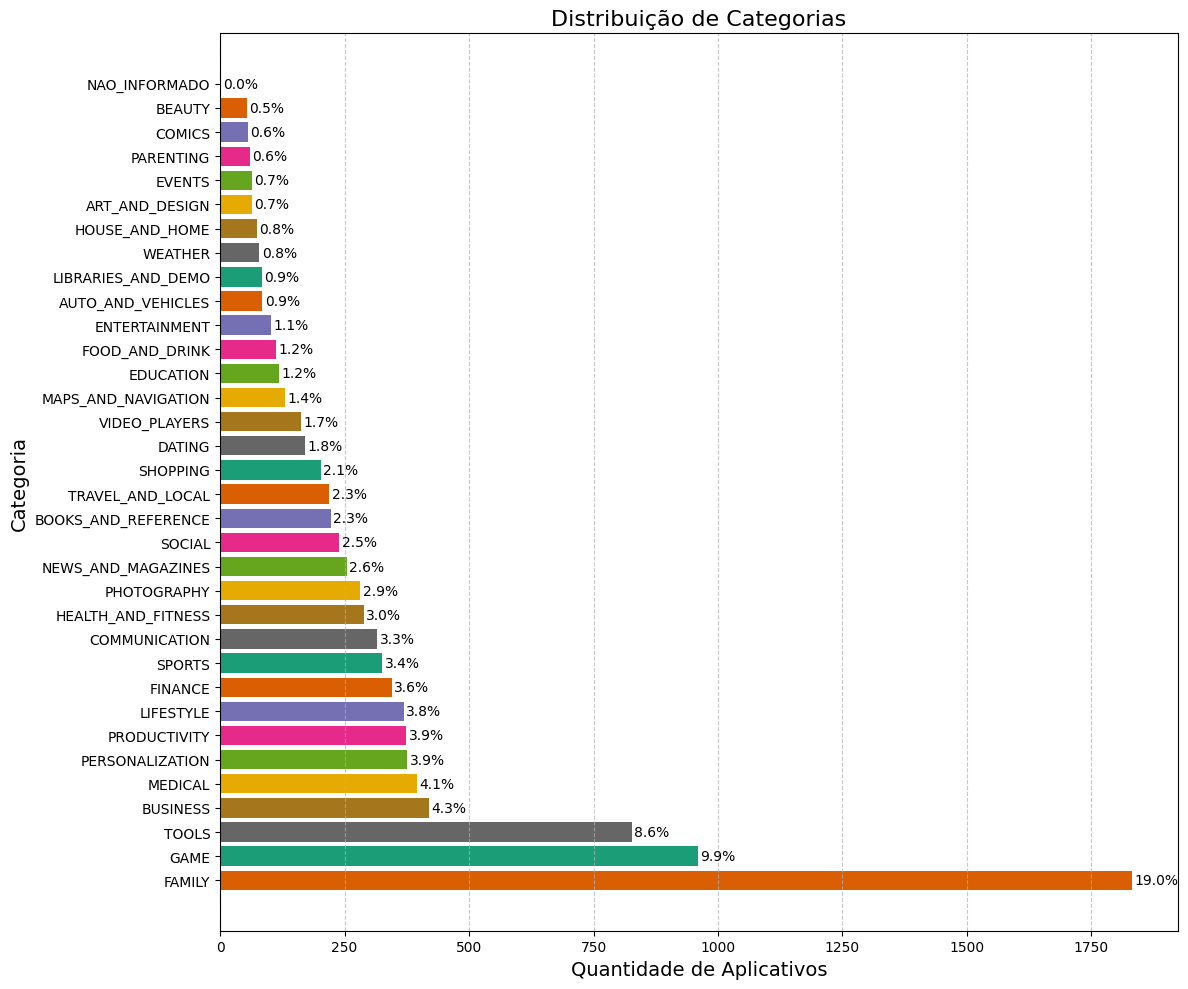

In [116]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 10))
plt.barh(contagem_categorias.index, contagem_categorias.values, color=plt.cm.Dark2.colors)

# Annotando as barras com os valores percentuais
for i, valor in enumerate(contagem_categorias.values):
    plt.text(
        valor + 5,  # Deslocamento do texto (+5)
        i,  # Posição do texto junto à posição da barra
        f"{valor / sum(contagem_categorias) * 100:.1f}%",
        va='center', fontsize=10
    )

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis() 
plt.xlabel('Quantidade de Aplicativos', fontsize=14)
plt.ylabel('Categoria', fontsize=14)
plt.title('Distribuição de Categorias', fontsize=16)


plt.tight_layout()
plt.show()

### App Mais Caro

A segui, faremos um filtro para obter o app de valor mais alto do dataset.

In [88]:
top_1_preco = df.nlargest(1, 'Price')
top_1_preco

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


Para visualizar como esse app se relaciona com os demais, buscamos uma visualização dos 10 aplicativos mais caros. Vamos utilizar um gráfico de barras simples para isso.

C:\Users\Intel\AppData\Local\Temp\ipykernel_9348\289979321.py:26: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Intel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


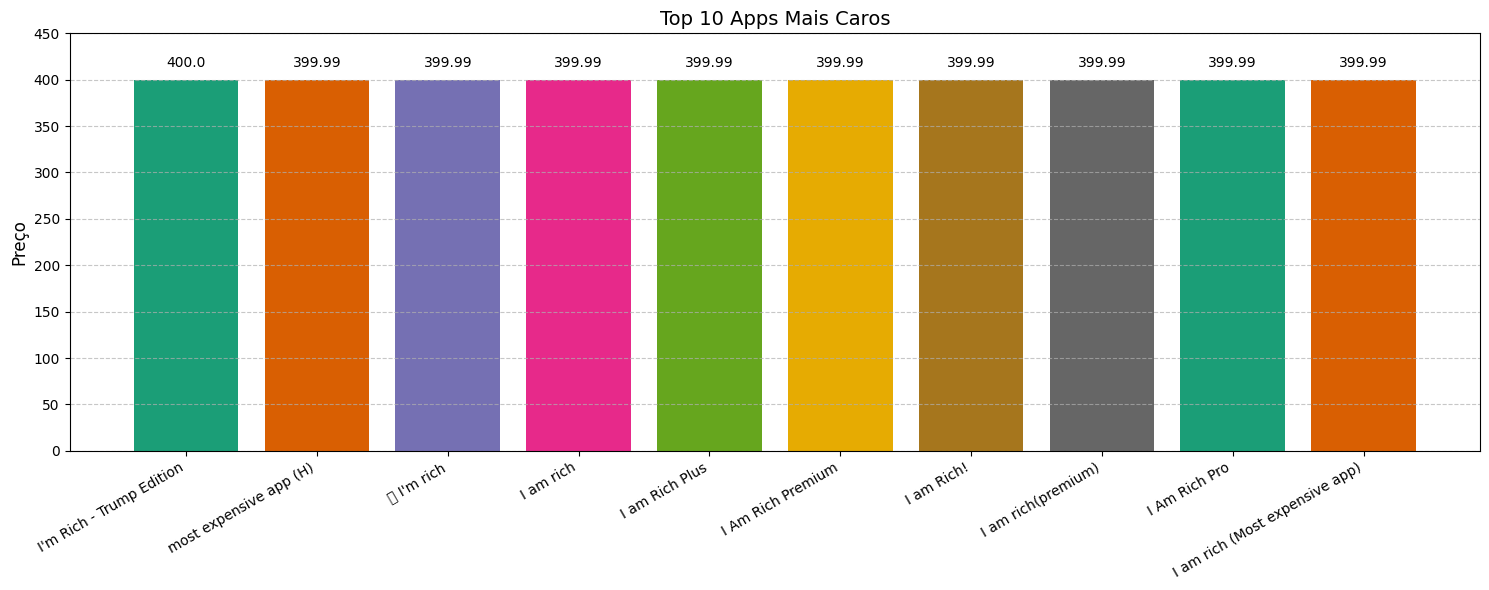

In [118]:
# Top 10 Apps Mais Caros
top_10_preco = df.nlargest(10, 'Price')

# Criando o gráfico de barras
plt.figure(figsize=(15, 6))
barras = plt.bar(top_10_preco['App'], top_10_preco['Price'], color=plt.cm.Dark2.colors)

# Anotando os valores de cada barra
for barra in barras:
    altura = barra.get_height()  # Obtendo a altura da barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # coordenada X (centro da barra)
        altura + 10,                    # coordenada Y (ligeiramente acima da barra)
        f'{altura:,}'.replace(',', ' '),   # formatando valores com espaços
        ha='center', va='bottom', fontsize=10, color='black'
)

# Definindo as legendas do eixo Y e a escala dos ticks, de 50 em 50, até 500
yticks = range(0, 500, 50)
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Preço', fontsize=12)

plt.title('Top 10 Apps Mais Caros', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Pelo nome dos aplicativos e pelos valores similares, nota-se uma tendência de um nicho de aplicativos de luxo.

### Quantidade de Apps para Maiores de 17

Abaixo, a quantidade de linhas na coluna `Content Rating` com o valor `Mature 17+`, correspondente a uma classificação para maiores de 17 anos.

Temos 393 aplicativos com essa classificação.

In [119]:
df[df['Content Rating'] == 'Mature 17+']['Content Rating'].value_counts()

Content Rating
Mature 17+    393
Name: count, dtype: int64

Para uma análise comparativa com o restante das categorias de classificação etária, observemos o gráfico da categoria:

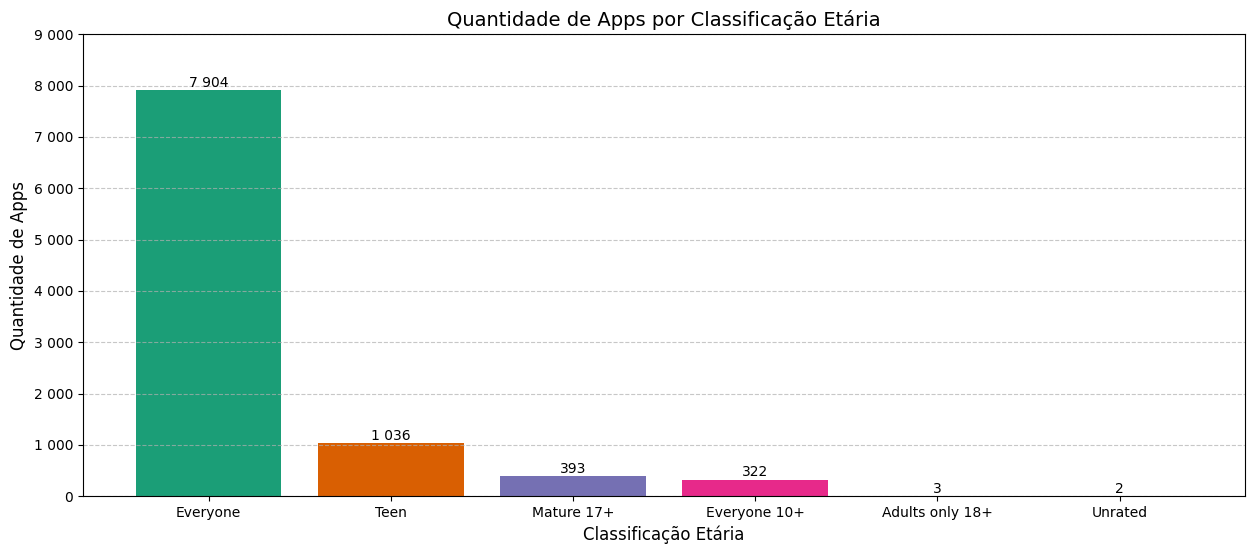

In [120]:
# Obtendo a contagem de valores nas categorias de classificação etária
contagem_classificacao = df['Content Rating'].value_counts()

# Plotando o resultando em um gráfico de barras
plt.figure(figsize=(15, 6))
barras = plt.bar(contagem_classificacao.index, contagem_classificacao.values, color=plt.cm.Dark2.colors)

# Anotando os valores de cada barra
for barra in barras:
    altura = barra.get_height()  # Obtendo a altura da barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # coordenada X (centro da barra)
        altura + 10,                    # coordenada Y (ligeiramente acima da barra)
        f'{altura:,}'.replace(',', ' '),   # formatando valores com espaços
        ha='center', va='bottom', fontsize=10, color='black'
)

# Definindo as legendas do eixo Y e a escala dos ticks, de 1000 em 1000, até 10000
yticks = range(0, 10000, 1000)
ytick_labels = [f'{y:,.0f}'.replace(',', ' ') for y in yticks]  # Formatando com espaços em vez de vírgulas
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Preço', fontsize=12)

plt.title("Quantidade de Apps por Classificação Etária", fontsize=14)
plt.xlabel('Classificação Etária', fontsize=12)
plt.ylabel('Quantidade de Apps', fontsize=12)

plt.show()

Nota-se que são poucos os aplicativos com restrição de idades, portanto, pode ser mais interessante desenvolver produtos para um mercado mais amplo inicialmente. Ou mirar em nichos específicos, em que a concorrência é bem menor.

### Top 10 Apps: Número de Reviews

A seguir uma lista decrescente com os 10 aplicativos com maior número de `Reviews`:

In [121]:
# Selecionando os 10 maiores valores da coluna 'Reviews'
top_10_reviews = df.nlargest(10, 'Reviews')
top_10_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,-1.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,-1.0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,-1.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,-1.0,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,-1.0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,-1.0,500000000,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up


Para uma melhor visualização da relação de diferença entre eles, vamos plotar um gráfico de barras simples.

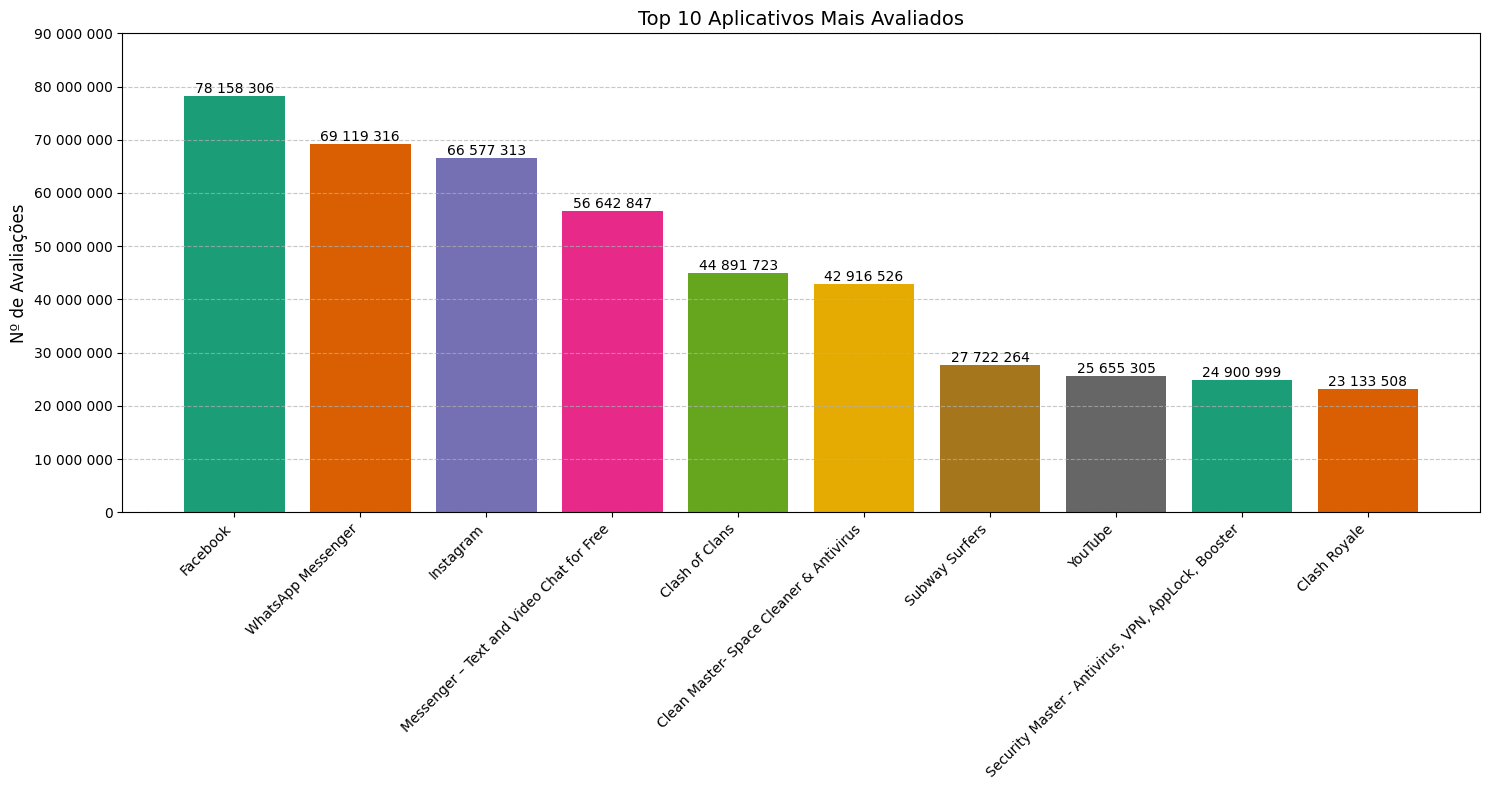

In [122]:
# Criando o gráfico Bar Plot / Barras
plt.figure(figsize=(15, 8))
posicao_barras = range(len(top_10_reviews['App']))  # Posição das barras
barras = plt.bar(posicao_barras, top_10_reviews['Reviews'], color=plt.cm.Dark2.colors)

# Anotando os valores de cada barra
for barra in barras:
    altura = barra.get_height()  # Obtendo a altura da barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # coordenada X (centro da barra)
        altura + 10,                    # coordenada Y (ligeiramente acima da barra)
        f'{altura:,}'.replace(',', ' '),   # formatando valores com espaços
        ha='center', va='bottom', fontsize=10, color='black'
)

# Definindo as legendas do eixo Y e a escala dos ticks, de 10M em 10M até chegar no valor de 100 milhões
yticks = range(0, 100_000_000, 10_000_000)
ytick_labels = [f'{y:,.0f}'.replace(',', ' ') for y in yticks]  # Formatando com espaços em vez de vírgulas
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Nº de Avaliações', fontsize=12)

# Definido as posições dos ticks e legendas do eixo X
plt.xticks(ticks=posicao_barras, labels=top_10_reviews['App'], rotation=45, ha='right')


plt.title('Top 10 Aplicativos Mais Avaliados', fontsize=14)
plt.tight_layout()
plt.show()

Vemos que os aplicativos mais avaliados são aqueles mais utilizados também, os de redes sociais, seguidos por jogos populares e ferramentas de rotina e manutenção do smartphone.

### Cálculos Adicionais

#### Top 10 Apps Melhor Avaliados: Rating

A seguir será feita uma análise correlacionando 3 variáveis: os aplicativos com 5 estrelas, agrupados por gênero, contabilizando a quantidade de aplicativos e número de avaliações (Reviews). Primeiramente, obtemos uma lista com os aplicativos 5 estrelas.

In [94]:
# Selecionando os aplicativos mais bem avaliados
cinco_estrelas = df[df['Rating'] == df['Rating'].max()]
cinco_estrelas

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up


A seguir, geramos uma lista agrupando esses aplicativos por `Genre`, calculando a contagem de aplicativos e soma de avaliações. Assim, ao relacionar o nº de estrelas com a quantidade de reviews, é possível entender os aplicativos que realmente são considerados de alta qualidade por um número grande de usuários.

In [128]:
# Agrupando os dados por 'Genre', calculando a quantidade de 'Apps' e a soma de 'Reviews'
sumario_genero = cinco_estrelas.groupby('Genres').agg(
    contagem_apps=('App', 'count'),  # Contando a quantidade de Apps em cada gênero
    total_reviews=('Reviews', 'sum')  # Soma de avaliações para cada gênero
).reset_index()

# Ordenando por 'contagem_apps' para organizar os pontos por quantidade de 'Apps'
sumario_genero = sumario_genero.sort_values('contagem_apps', ascending=False)

sumario_genero

,Genres,contagem_apps,total_reviews
9,Education,42,490
17,Lifestyle,29,482
18,Medical,25,67
11,Entertainment,19,105
4,Business,18,80
30,Tools,17,173
15,Health & Fitness,12,54
21,Personalization,10,41
13,Finance,8,133
23,Productivity,8,74


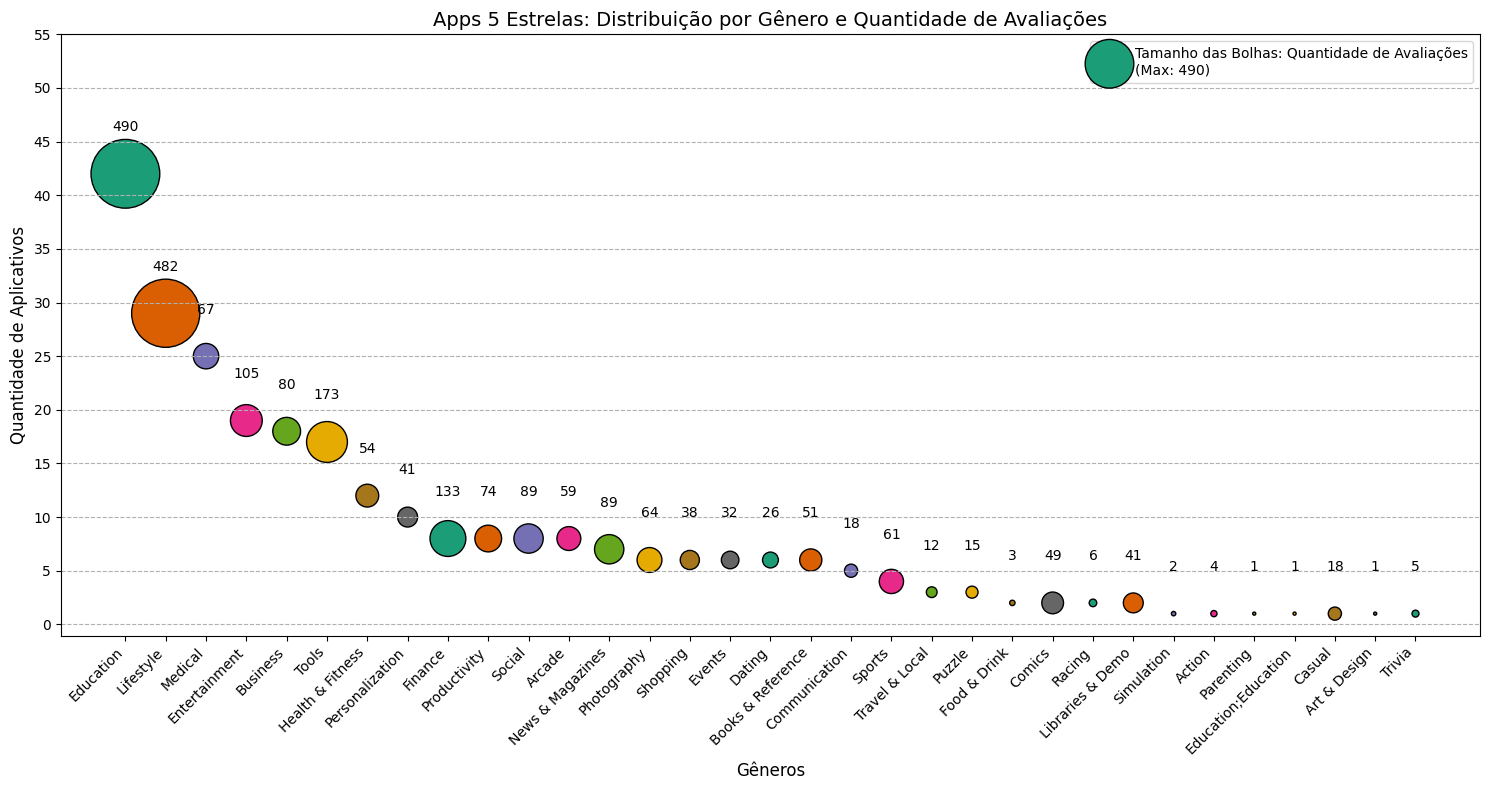

In [140]:
# Criando o gráfico de bolha / bubble scatter plot
plt.figure(figsize=(15, 8))

# Definindo os eixos X e Y, e tamanho de bolhas proporcional ao 'total de reviews'
scatter = plt.scatter(
    sumario_genero['Genres'],           # Eixo-x: Genres
    sumario_genero['contagem_apps'],        # Eixo-y: Quantidade de Aplicativos
    s=sumario_genero['total_reviews']/0.2,  # Tamanho da Bolha: aumentado em 20%
    color=[plt.cm.Dark2.colors[c % len(plt.cm.Dark2.colors)] for c in range(len(sumario_genero['Genres']))],   # Usando modulo para iterar com loop por todas as cores
    edgecolors='black'
)

# Adicionando anotações para cada gênero
for i, linha in sumario_genero.iterrows():
    plt.text(
        linha['Genres'], 
        linha['contagem_apps'] + 5, 
        f"{int(linha['total_reviews']):,}",
        fontsize=10, ha='center', va='top'
    )

# Definindo as legendas do eixo Y e a escala dos ticks
yticks = range(0, 60, 5)
plt.yticks(ticks=yticks)
plt.ylabel('Quantidade de Aplicativos', fontsize=12)
plt.title('Apps 5 Estrelas: Distribuição por Gênero e Quantidade de Avaliações', fontsize=14)
plt.xlabel('Gêneros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adicionando legenda para relacionar o tamanho da bolha ao nº de avaliações
max_reviews = sumario_genero['total_reviews'].max()
plt.legend(
    [scatter], [f"Tamanho das Bolhas: Quantidade de Avaliações\n(Max: {max_reviews:,})"],
    loc='upper right', fontsize=10, frameon=True
)

plt.tight_layout()
plt.show()

#### Pior App

Para obter o pior app do dataset, isto é, aquele com as piores avaliações, vamos realizar 2 filtros:

- primeiro selecionar uma lista com os apps de avaliações mais baixas, a partir da coluna `Rating`
- após isso, pegar o app com maior quantidade de `Reviews`

Assim, temos uma confirmação de que um número maior de pessoas acha o app ruim.

In [133]:
# Selecionando os aplicativos piores avaliados
uma_estrela = df[df['Rating'] == df['Rating'].min()]

# Filtrando para obter o aplicativo com a maior quantidade de avaliações
pior_avaliado = uma_estrela[uma_estrela['Reviews'] == uma_estrela['Reviews'].max()]

pior_avaliado

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100,Free,0.0,Everyone,Communication,2017-10-06,1.0,4.1 and up


In [135]:
# Agrupando os dados por 'Genre', calculando a quantidade de 'Apps' e a soma de 'Reviews'
sumario_piores = uma_estrela.groupby('Genres').agg(
    contagem_apps=('App', 'count'),    # Contando a quantidade de Apps em cada gênero
    total_reviews=('Reviews', 'sum')   # Soma de avaliações para cada gênero
).reset_index()

# Ordenando por 'contagem_apps' para organizar os pontos por quantidade de 'Apps'
sumario_piores = sumario_piores.sort_values('contagem_apps', ascending=False)

sumario_piores

,Genres,contagem_apps,total_reviews
4,Education,3,4
6,Medical,3,4
8,Tools,3,6
5,Finance,2,5
0,Business,1,1
1,Card,1,1
2,Communication,1,5
3,Dating,1,1
7,Productivity,1,1


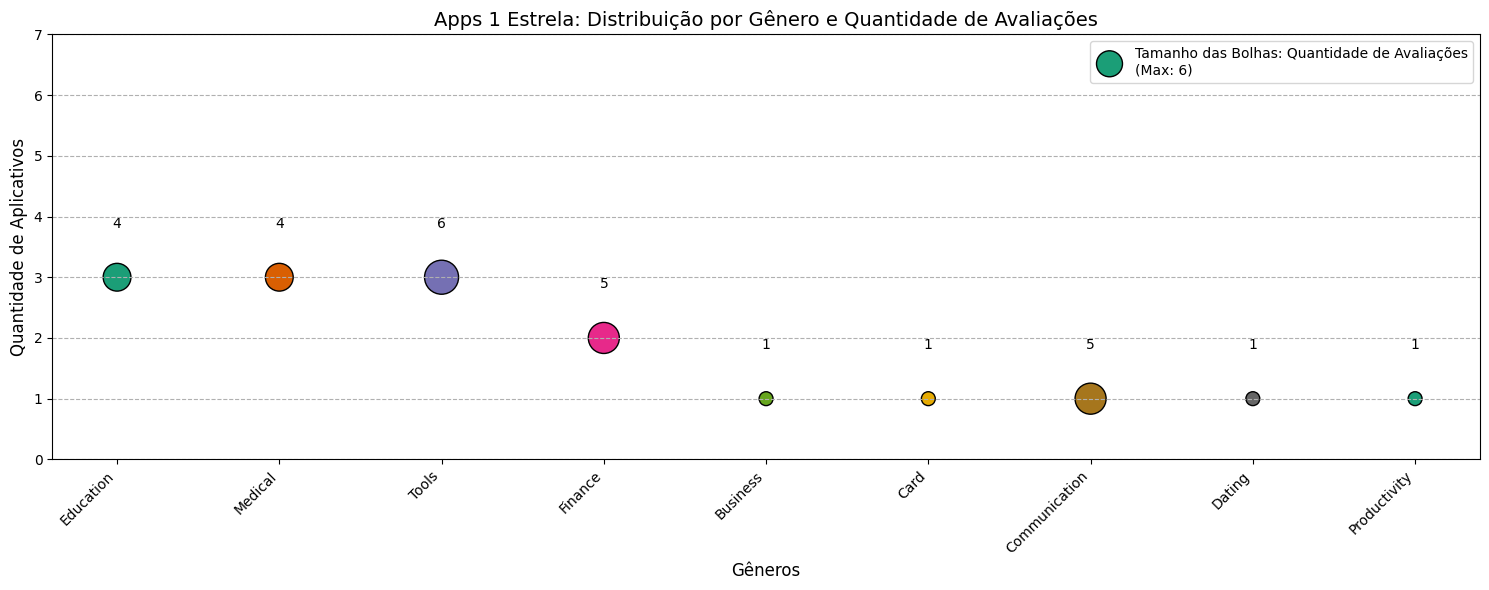

In [143]:
# Criando o gráfico de bolha / bubble scatter plot
plt.figure(figsize=(15, 6))

# Definindo os eixos X e Y, e tamanho de bolhas proporcional ao 'total de reviews'
scatter = plt.scatter(
    sumario_piores['Genres'],           # Eixo-x: Genres
    sumario_piores['contagem_apps'],        # Eixo-y: Quantidade de Aplicativos
    s=sumario_piores['total_reviews']/0.01,  # Tamanho da Bolha: aumentado em 20%
    color=[plt.cm.Dark2.colors[c % len(plt.cm.Dark2.colors)] for c in range(len(sumario_piores['Genres']))],   # Usando modulo para iterar com loop por todas as cores
    edgecolors='black'
)

# Adicionando anotações para cada gênero
for i, linha in sumario_piores.iterrows():
    plt.text(
        linha['Genres'], 
        linha['contagem_apps'] + 1, 
        f"{int(linha['total_reviews']):,}",
        fontsize=10, ha='center', va='top'
    )

# Definindo as legendas do eixo Y e a escala dos ticks
yticks = range(0, 8)
plt.yticks(ticks=yticks)
plt.ylabel('Quantidade de Aplicativos', fontsize=12)
plt.title('Apps 1 Estrela: Distribuição por Gênero e Quantidade de Avaliações', fontsize=14)
plt.xlabel('Gêneros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Adicionando legenda para relacionar o tamanho da bolha ao nº de avaliações
max_reviews = sumario_piores['total_reviews'].max()
plt.legend(
    [scatter], [f"Tamanho das Bolhas: Quantidade de Avaliações\n(Max: {max_reviews:,})"],
    loc='upper right', fontsize=10, frameon=True
)

plt.tight_layout()
plt.show()